# IDS Assignment 1
This is a Jupyter Notebook created for the analysis on the given dataset for the IDS assignment #1. The assignment is done collaborately by the group of 3 members. The details are as follows,

Group ID : IDS_GROUP068

Group Members:

1. DEEPAK G
2. PONMUTHUKUMAR B
3. MUGUNDHAN K


Problem statement
##Business Context

Using the given data set for New York City Current Job Posting data.

Business Problem Understanding

Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:

a)What are the highest paid Skills in the US market?
b)What are the job categories, which involve above mentioned niche skills?
c) Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience
The analysis on the data is done in the following sequence of steps.

Import Libraries
Load the data
Exploratory Data Analysis

##Step 0: Import libraries

In [1]:

import pandas as pd
import numpy as np

#Data preprocessing Librry
from sklearn import preprocessing

#Ploting Library  
import seaborn as sns
import matplotlib.pyplot as plt

#Natural Langauge processing Library
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re


Step 2: Loading Data
Loading the dataset from the jobs.csv file. The dataset will be loaded into Dataframe which is further used for data pre-processing and exploratory data analysis.

In [2]:
jobs = pd.read_csv('jobs.csv')
le = preprocessing.LabelEncoder()
jobs.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


##Step 3: Exploratory Data Analysis
Information about the data
The scheme of the data can be explored by examining the information about the dataset such as number of entries, column count, data type of the columns and the null constraints. As part of the Exploratory Data Analysis, we need to find out the properties of the attributes and identify the suitable variables for further analysis.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnhistogramDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '
C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


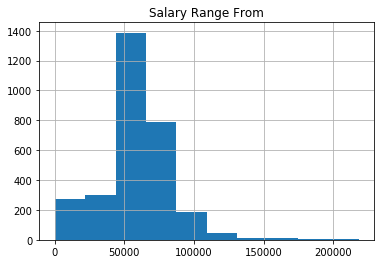

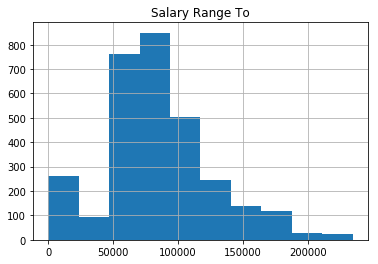

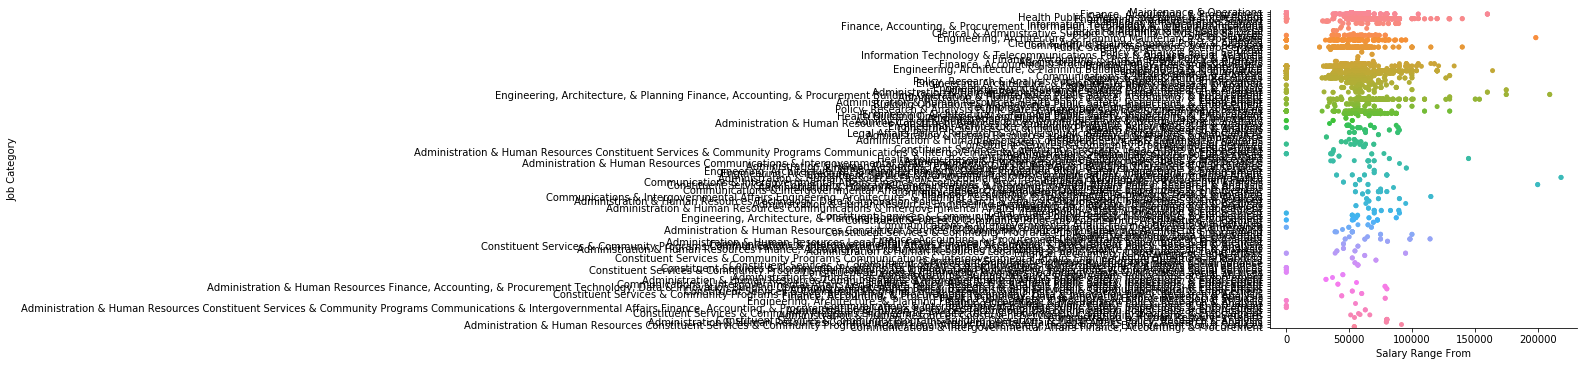

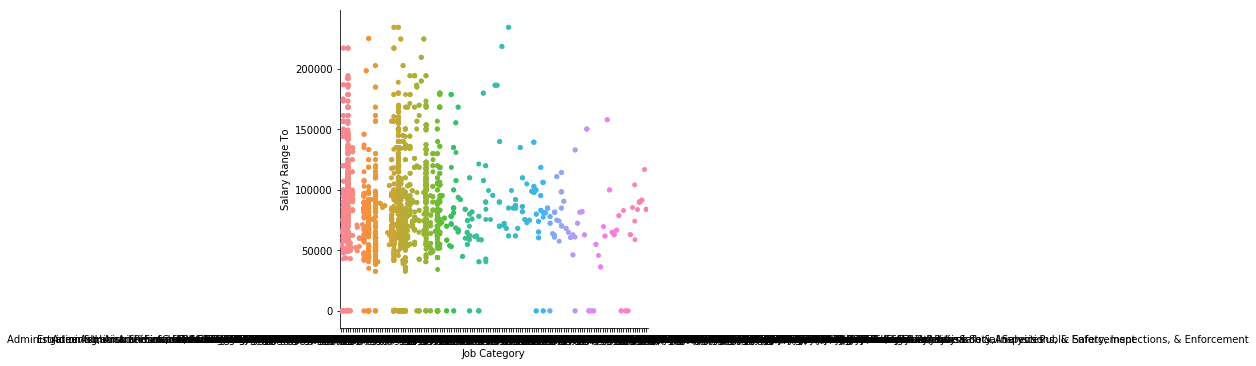

In [4]:
jobs.shape
jobs.columns
jobs.info()
jobs.describe()
jobs.hist(column='Salary Range From')
jobs.hist(column='Salary Range To')
sns.catplot(x='Salary Range From',y="Job Category", data=jobs);
sns.catplot(x="Job Category", y='Salary Range To', data=jobs);

[]

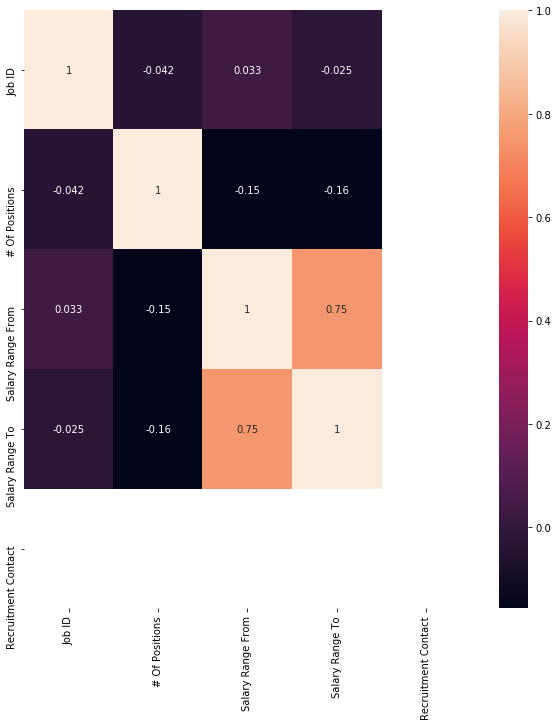

In [5]:
#Correlation Feature matrix
plt.figure(figsize=(10,11))
sns.heatmap(jobs.corr(),annot=True)
plt.plot()  


Step 3.1: Identification of Variables
The variables need to be identified for further processing and analysis. The variables can be identified two ways,

Variables with minimum percentage of null values. Here 30% of total dataset volume will be allowed as null or NaN values. The variables that are more than 30% will not be considered for analysis.
The 'Additional Information','Post Until','posting_date','posting_updated','process_date' attributes will also not contribute for analysis so they will be removed.

In [6]:
jobs.drop(['Additional Information','Post Until','Posting Date','Posting Updated','Process Date','Hours/Shift','Work Location 1','Recruitment Contact','Division/Work Unit'], axis=1, inplace=True)
jobs.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title',
              'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high',
              'salary_frequency', 'work_unit', 'job_description', 'minimum_requirements', 
              'preferred_skills',
              'to_apply', 
               'residency_requirement']

Step 3.1: Finding Missing Values

id                         0
agency                     0
posting_type               0
number_of_positions        0
business_title             0
civil_service_title        0
title_code_number          0
level                      0
job_category               2
full-time/part-time      209
salary_range_low           0
salary_range_high          0
salary_frequency           0
work_unit                  0
job_description            0
minimum_requirements      16
preferred_skills         439
to_apply                   1
residency_requirement      2
dtype: int64


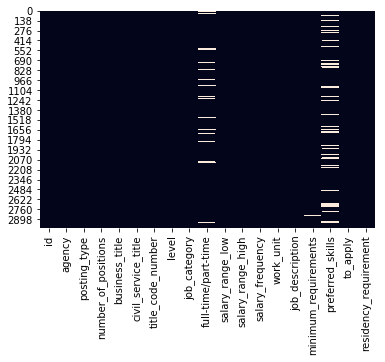

In [7]:
print(jobs.isnull().sum())
print('==========================================')
sns.heatmap(jobs.isnull(), cbar=False)

id                       0
agency                   0
posting_type             0
number_of_positions      0
business_title           0
civil_service_title      0
title_code_number        0
level                    0
salary_range_low         0
salary_range_high        0
salary_frequency         0
work_unit                0
job_description          0
job_category             0
full-time/part-time      0
preferred_skills         0
residency_requirement    0
to_apply                 0
minimum_requirements     0
dtype: int64


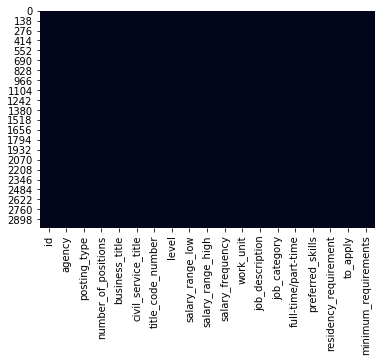

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
nan_cols = ['job_category', 'full-time/part-time', 'preferred_skills','residency_requirement', 'to_apply','minimum_requirements']
cols = [col for col in jobs.columns if col not in nan_cols]

# print(cols)
# Apply the imputation on the dataset
imputed_data = pd.DataFrame(imputer.fit_transform(jobs[nan_cols]), columns=nan_cols)

# # imputed_data.head()
jobs = pd.concat([jobs[cols], imputed_data], axis=1)
# Empty values plot

print(jobs.isnull().sum())

print('==========================================')
sns.heatmap(jobs.isnull(), cbar=False)


Step 4: Feature Engineering
There are few variables in the dataset are of type text(refer the columns info). We need perform certain feature engineering operations to clean, transform and reduce those features.

The first and foremost text preprocessing step is to remove unwanted characters such as special characters, unwanted whitespaces and punctuation. The following functions will be used to remove the special charaters from the text data.

In [9]:

def project_salary_to_annual(freq,salary):
    if (freq == 'Hourly'):
        return salary * 8 * 20 * 12
    elif (freq == 'Daily'):
        return salary * 20 * 12    
    else :
        return salary
    
# Invoking the method
jobs['projected_salary_from'] = jobs.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_low), axis=1)
jobs['projected_salary_to'] = jobs.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_high), axis=1)

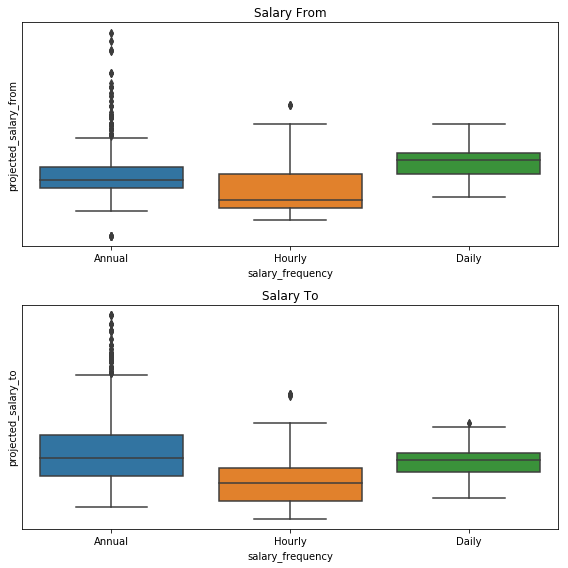

In [10]:
fig, axes = plt.subplots(2,1, figsize=(8,8), squeeze=False)
axes[0][0].set_title("Salary From")
axes[1][0].set_title("Salary To")

sns.boxplot(x='salary_frequency',y='projected_salary_from', data=jobs, ax=axes[0][0])
sns.boxplot(x='salary_frequency',y='projected_salary_to', data=jobs, ax=axes[1][0])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [11]:
"""
    Extracting the year value from the preferred skills attribute
"""
def extract_years_exp(doc):
    phrase = ""
    num_year = 1
    try:
        str_num_pattern = r'(zero|one|two|three|four|five|six|seven|eight|nine|ten)'
        num_dict = {'zero':0, 'one':1, 'two':2, 'three':3, 'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10}
        # Search for text numeric value
        match = re.search(str_num_pattern, doc, re.IGNORECASE)
        if match:
            statement = re.sub(str_num_pattern, str(num_dict[match.group(0).lower()]), doc.lower(), re.IGNORECASE)
            statement = statement.strip()
        
            exp_pattern = r'.?[(0-9)|(0-9\+)]\s+years'
        
            exp_phrase = re.search(exp_pattern, statement, re.IGNORECASE)
            if exp_phrase:
                opr_pattern = r'(\+|\)|\(|\-|years)'
                phrase = exp_phrase.group(0).strip()    
                year_val = re.sub(opr_pattern, "", phrase).strip()
                
                if year_val:
                    num_year = int(year_val)
                    if int(year_val) > 10:
                        num_year = int(year_val[0])
                    else:
                        num_year
        else:
            phrase = np.nan
    except IndexError as ie:
        pass
    return num_year

def extract_skills(doc):
    statement = ""
    num_year = 1
    try:
        patterns = (r'=?.(with|proficiency)\s+\w{3}+', r'\w{2}+\s+(skills|acquired)')
        # Search for text numeric value
        for ptrn in patterns:
            match = re.search(ptrn, doc, re.IGNORECASE)
            if match:
                statement = match.group(0).lower().strip()
                break
    except IndexError as ie:
        pass
    return statement


'''
    Cleanse the special characters, white space and punctuations.
'''
def cleanse_text_impurities(text_val):
    try:
        # remove the special characters
        text_val = re.sub(r'[^(a-zA-Z)|(0-9)\s]', ' ', text_val, re.I|re.A)
        text_val = text_val.strip()
        
        return text_val
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))


In [12]:
str_cols = ['job_description', 'full-time/part-time', 'minimum_requirements','preferred_skills','residency_requirement']

# Iterate through the dataframe and apply the cleansing function
for col in str_cols:
    jobs[col] = jobs[col].apply(cleanse_text_impurities)

jobs[str_cols]

,job_description,full-time/part-time,minimum_requirements,preferred_skills,residency_requirement
0,Division of Economic Financial Opportunity (...,F,1 \tA baccalaureate degree from an accredited ...,Excellent interpersonal and organizational ski...,New York City residency is generally required ...
1,The New York City Department of Small Business...,F,1 A baccalaureate degree from an accredited c...,ERROR NAME,New York City residency is generally required ...
2,Under direct supervision assist in the routin...,F,1 Three years of full time satisfactory exper...,1 A High School Diploma or GED 2 CDL Dri...,NYCHA has no residency requirements
3,Under direct supervision assist in the routin...,F,1 Three years of full time satisfactory exper...,1 A High School Diploma or GED 2 CDL Dri...,NYCHA has no residency requirements
4,Responsibilities of selected candidates will i...,F,1 Five years of full time satisfactory experi...,ERROR NAME,NYCHA has no residency requirement
5,Responsibilities of selected candidates will i...,F,1 Five years of full time satisfactory experi...,ERROR NAME,NYCHA has no residency requirement
6,OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY Y...,F,1 A baccalaureate degree from an accredited c...,Strong analytical background advanced profic...,New York City residency is generally required ...
7,Working in the Distribution Water Quality Oper...,F,Qualification Requirements A baccalaureate de...,In order to apply for this position the candi...,New York City residency is generally required ...
8,Reporting to the Deputy Director of Technical ...,F,1 A master s degree from an accredited colleg...,1 Five years of managerial and supervisory e...,NYCHA has no residency requirements
9,Performs essential administrative functions th...,F,Qualification Requirements A four year high s...,Experience with Law Manager and Microsoft Offi...,New York City residency is generally required ...


In [13]:
jobs['Years of Experience'] = jobs['preferred_skills'].apply(extract_years_exp)

In [14]:
jobs['Years of Experience']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       5
9       1
10      1
11      5
12      5
13      1
14      1
15      1
16      1
17      1
18      1
19      3
20      4
21      1
22      1
23      3
24      1
25      1
26      6
27      6
28      1
29      1
       ..
2990    3
2991    1
2992    1
2993    1
2994    1
2995    1
2996    1
2997    1
2998    1
2999    1
3000    1
3001    1
3002    1
3003    1
3004    1
3005    1
3006    1
3007    1
3008    1
3009    1
3010    1
3011    1
3012    1
3013    1
3014    1
3015    1
3016    1
3017    1
3018    1
3019    1
Name: Years of Experience, Length: 3020, dtype: int64

Step 5: Analysis
The analysis are done on the following questions,

a. What are the highest paid skills in the US market?
b. What are the highest paid Job Category in the US market?

In [15]:
# highest_paid_skills = posting_data.groupby(['Job Category','Preferred Skills'])['Salary Range From','Salary Range To'].mean()
highest_paid_skills = jobs.groupby(['job_category','preferred_skills','Years of Experience'])['salary_range_low'].mean()

highest_paid_skills = highest_paid_skills.reset_index()
top_paid_list = highest_paid_skills.nlargest(20, 'salary_range_low')
# top_paid_list.sort_values(by='Salary Range From', ascending=False)

In [16]:
# Lambda expression to split the comma delimited category name and extract only the first token
short_job_name = lambda x: x.split(',')[0]

top_paid_list.index = top_paid_list['job_category'].apply(short_job_name)
top_paid_list.drop(['job_category'], axis=1)
# Print the top paid skillset list
# top_paid_list

,preferred_skills,Years of Experience,salary_range_low
job_category,,,
Administration & Human Resources Finance,The Deputy Commissioner position requires exce...,10,218587.00
Engineering,The Deputy Commissioner position requires \...,1,209585.00
Constituent Services & Community Programs Communications & Intergovernmental Affairs Policy,ERROR NAME,1,200000.00
Engineering,Extensive experience in wastewater operations ...,1,198518.00
Administration & Human Resources Policy,ERROR NAME,1,175000.00
Engineering,Required Skills \tIn depth knowledge o...,1,175000.00
Technology,The successful candidate will have 5 6 years o...,6,164104.00
Administration & Human Resources Public Safety,At least 10 years of managerial experience in ...,1,160000.00
Finance,Clearly demonstrated experience trading money ...,1,160000.00


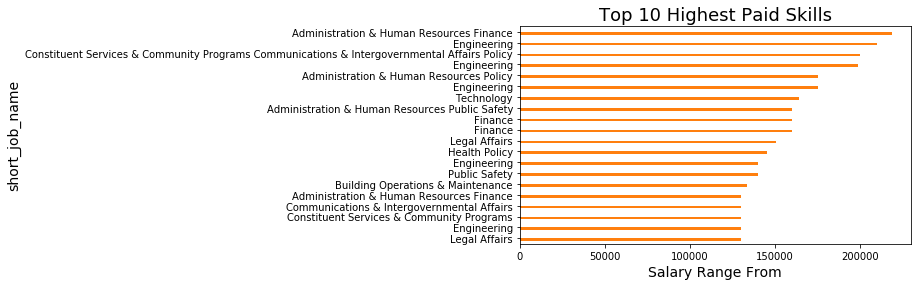

In [17]:
fig, barax = plt.subplots(figsize=(7,4))
top_paid_list.plot(ax=barax, kind='barh', legend = False)

barax.set_title("Top 10 Highest Paid Skills", fontsize=18)
barax.set_ylabel("short_job_name", fontsize=14)
barax.set_xlabel("Salary Range From", fontsize=14)
# barax.legend(bbox_to_anchor=(1.0, 1.00))
barax.invert_yaxis()
plt.show()

In [18]:
print("The highest paid skills in the US job market is :\n {0}".format(top_paid_list['preferred_skills'][0]))
print("==="*40)
print("The Job Category is- {0}".format(top_paid_list['job_category'][0]))

The highest paid skills in the US job market is :
 The Deputy Commissioner position requires excellent leadership  communication and client service skills as well as a passion for driving innovation  continuous improvement and efficiency  and implementing workforce strategies to recruit  develop and retain the most qualified and diverse talent in a customer service environment  The selected candidate will be expected to work closely with Agency and oversight counterparts and must have excellent management skills focused on staff alignment with the Bureau        s vision  goals and career development  In addition  he she must be an effective team player  capable of sustaining a culture of excellence in the delivery of customer service to internal partners and possess the ability to establish and maintain effective external partnerships and collaboration    Specifically  the following skills and abilities are required to be successful in this role            	7 10 years relevant work exp

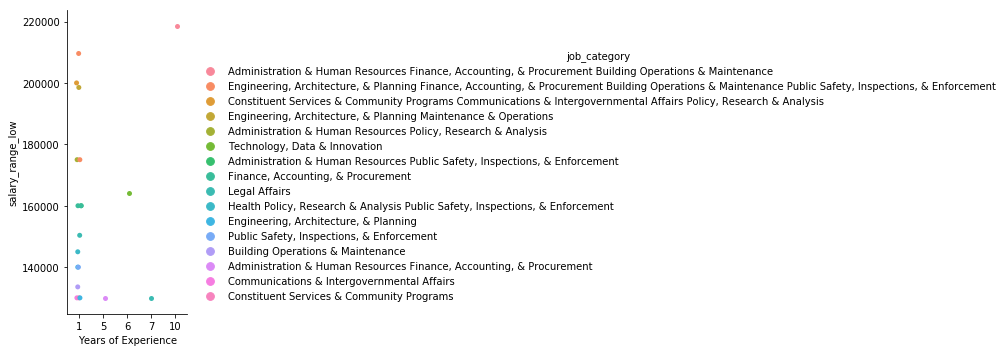

In [19]:
top_paid_list[["job_category",'salary_range_low']]
sns.catplot(x="Years of Experience", y='salary_range_low',hue="job_category", data=top_paid_list);
